In [1]:
# 유방암 데이터 세트 준비
# 사이킷런의 datasets 모듈 아래에 있는 load_breast_cancer() 함수를 사용하면 된다.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()



In [2]:
# 입력 데이터 확인

print("cancer.data.shape :",cancer.data.shape, "cancer.target.shape : ",cancer.target.shape)

cancer.data.shape : (569, 30) cancer.target.shape :  (569,)


In [6]:
cancer.data[:5] # 실수 범위의 값, 양수와 음수가 석여있다.

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

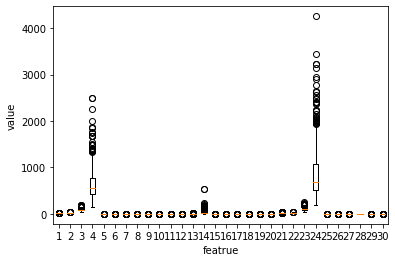

In [4]:
# 박스플롯으로 특성 사분위 관찰
# 박스플롯은 1사분위와 3사분위 값으로 상자를 그린 다음 그 안에 2사분위(중간값)값을 표시한다. 
# 그 다음 1사분위와 3사분위 사이 거리(interqurartile range)의 거리 1.5배만큼 위아래 거리에서 각각 가장 큰 값과 가장 작은 갓까지 수염을 그린다.


plt.boxplot(cancer.data)
plt.xlabel('featrue')
plt.ylabel('value')
plt.show()


In [6]:
# 4, 14, 24번 특성이 다른 특성보다 분포가 크다.  데이터 확인하기
cancer.feature_names[[3,13,23]] # index 0 부터 시작하니 3,13,23
# 모두 넓이와 관련된 특성



array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [7]:
# 타깃 데이터 확인

np.unique(cancer.target, return_counts=True)
# cancer.target 배열 안에는 0과 1만 들어있다. 
# 0은 음성 1은 양성 클래스를 의미한다.
# unique()함수를 사용하면 고유한 값을 찾아 반환한다. 
# return_counts 매개변수를 True로 지정하면 고유한 값이 등장하는 횟수까지 세어 반환한다.
# 212개 음성 클래스, 357개 양성 클래스

(array([0, 1]), array([212, 357], dtype=int64))

In [8]:
# 훈련 데이터 세트 저장
x = cancer.data
y = cancer.target

# 로지스틱 회귀를 위한 뉴런 만들기 



In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,stratify=y, test_size=0.2, random_state=42)
# stratify = y
# stratify는 훈련 데이터를 나눌 때 클래스 비율을 동일하게 만든다. train_test_split() 함수는 기본적으로 데이터를 나누기 전에 
# 섞지만 일부 클래스 비율이 불균형한 경우 stratify를 y로 지정해야 한다.

# test_size = 0.2
# train_test.split() 함수는 기본적으로 훈련 데이터 세트를 7.5 : 2.5 비율로 나눈다. 하지만 필요한 경우 이 비율을 조절하고 싶을 때도 있다.
# 여기서는 입력된 데이터 세트의 20%를 테스트 세트로 나누기 위해 test_size를 0.2로 조정

# random_state = 42
# train_test_split() 함수는 무작위로 데이터 세트를 섞은 다음 나눈다. 이 책에서는 섞은 다음 나눈 결과가 항상 일정하도록 random_state 매개변수에 난수 초깃값 42를 지정
# 실전에서는 사용할 필요가 없다




In [11]:
# 결과 확인하기

print("x_train.shape : ",x_train.shape, "x_test.shape : ",x_test.shape)
# 4대 1 비율로 나눠짐



x_train.shape :  (455, 30) x_test.shape :  (114, 30)


In [12]:
# unique()함수로 훈련 세트 타깃 확인

np.unique(y_train, return_counts=True) # 클래스 비율 그대로 유지
# 양성 클래스가 음성 클래스보다 1.7배 정도 많다.





(array([0, 1]), array([170, 285], dtype=int64))

In [13]:
# 로지스틱 회귀 구현하기

class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b # 직선 방ㅈㅇ식 계싼
        return z
    
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그레디언트 계산
        b_grad = 1 * err # 절편에 대한 그레디언트 계산
        
        
# __init__ 메서드에서는 입력 데이터의 특성이 많아 가중치와 절편을 미리 초기화 하지 않는다.
# 가중치는 나중에 입력 데이터를 보고 특성 개수에 맞게 결정한다.

# forpass() 메서드에 넘파이 함수 사용 np.sum() x*self.w에서 x와 w는 1차원 넘파이 배열인데 넘파이 배열에 사칙연산 적용시 자동으로 
# 배열의 요소끼리 계산한다.

In [14]:
# 훈련하는 메서드 구현하기

# 훈련 수행  fit()메서드 구현

def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1]) # 가중치 전부 1로 초기화
    self.b = 0 # 절편
    
    for i in range(epochs): #epochs만큼 반복
        for x_i,y_i in zip(x, y): # 모든 샘플에 대해 반복
            z = self.forpass(x_i)  #정방향 계산
            a = self.activation(z) # 활성화 함수 적용
            err = -(y_i - a)# 오차 계산
            w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
            self.w -= w.grad # 가중치 업데이트
            self.b -= b.grad # 절편 업데이트
        

In [15]:
# activation() 메서드 구현
# activation() 메서드에서는 시그모이드 함수가 사용되어야 한다. np.exp()사용시 간단히 만든다.  
# np.exp = 자연 상수의 지수 함수 계산

def activation(self, z):
    a = 1/(1+np.exp(-z)) # 시그모이드 계산
    return a



In [16]:
# 예측하는 메서드 구현
# 예측값 계산시 forpass() 메서드 사용
# 새로운 샘플에 대한 예측값 계산해주는 메서드 predict() 메서드 만들기

# 매개변수 갑승로 입력값 x가 2차원 배열로 전달된다고 가정

def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # 선형 함수 적용 , 리스트 내포 문법
    a = self.activation(np.array(z)) # 활성화 함수 적용
    return a > 0.5 # 계단 함수 적용

In [17]:
# 구현 종합

class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
        
    def forpass(self, x):
        z = np.sum(x*self.w) + self.b # 직선 방정식 계산
        return z
    
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그레디언트 계산
        b_grad = 1 * err # 절편에 대한 그레디언트 계산
        return w_grad, b_grad
        
    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp()계산 위해서
        a = 1/(1+np.exp(-z)) # 시그모이드 계산
        return a
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1]) # 가중치 전부 1로 초기화
        self.b = 0 # 절편

        for i in range(epochs): #epochs만큼 반복
            for x_i,y_i in zip(x, y): # 모든 샘플에 대해 반복
                z = self.forpass(x_i)  #정방향 계산
                a = self.activation(z) # 활성화 함수 적용
                err = -(y_i - a)# 오차 계산
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= w_grad # 가중치 업데이트
                self.b -= b_grad # 절편 업데이트
                
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x] # 선형 함수 적용 , 리스트 내포 문법
        a = self.activation(np.array(z)) # 활성화 함수 적용
        return a > 0.5 # 계단 함수 적용
    
    

In [18]:
# 로지스틱 회귀 모델 훈련시키기

neuron = LogisticNeuron() # 객체 생성
neuron.fit(x_train, y_train)



In [19]:
# 모델 정확도 평가

np.mean(neuron.predict(x_test) == y_test)

# predit() 메서드 반환값은 True나 False로 채워진(m,) 크기의 배열이고 y_test는 0또는 1로 채워진(m,) 크기의 배열이므로 바로 비교각 가능하다.

# np.mean()함수는 매개변수 값으로 전달한 비교문결과(넘파이 배열)의 평균을 계산한다.
# 계산 결과 0.8245...~ 는 올바르게 예측한 샘플의 비율이 된다. 
# 이를 정확도(accuracy) 라고 한다.

0.8245614035087719

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer



class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    
    def forpass(self, w):
        z = np.sum(x * self.w) + self.b # 직선 방정식 계산
        return z
    
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그레이디언트 계산
        b_grad = 1 * err # 절편에 대한 그레이디언트 계산
        return w_grad, b_grad
    
    def add_bias(self, x):
        return np.c_[np.ones((x.shape[0],1)), x] # 행렬의 맨 앞에 1로 채워진 열 벡터를 추가
    
    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp()계산 위해서
        a = 1/(1+np.exp(-z)) # 시그모이드 계산
        return a
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1]) # 가중치 1로 초기화
        self.b = 0 # 절편 초기화
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x))) # 인덱스 섞기
            for i in indexes:      # 모든 샘플 반복
                z = self.forpass(x[i]) # 정방향 계산 
                a = self.activation(z) # 활성화 함수 적용
                err = -(y[i] - a) # 오차 계산
                w_grad, b_grad = self.backprop(x[i], err) # 역방향 계산
                self.w -= w_grad # 가중치 업데이트
                self.b -= b_grad # 절편 업데이트
                # 안전한 로그 계산을 위해 클리핑 후 손실 누적
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a)) # 에포크마다 손실을 저장
            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0 # 계단 함수 적용
    
    def score(self, x, y):
        return np.mean(self.predict(x) == y)
        

In [23]:

layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.631578947368421